# Ensemble (Random Forest, Bagging, Boosting)

# 1. 데이터 전처리 (iris data)

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)
# sklearn은 iris 데이터를 숫자로 주기 때문에 species를 보기 편하게 이름으로 저장하는 column을 임의로 만들어준다
data['species'] = np.array([iris.target_names[i] for i in iris.target])

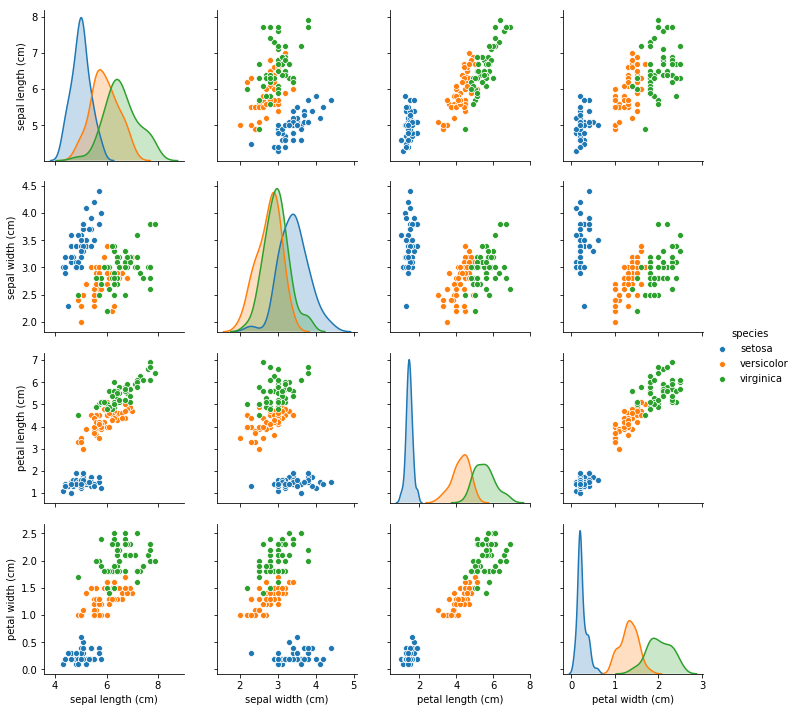

In [4]:
sns.pairplot(data, hue='species')

# 2. Train data Test data 나누기

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[iris.feature_names], iris.target, test_size = 0.3, 
                                                    stratify=iris.target, random_state=1234)

# 3. Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X_train,y_train)
print("Trainset 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("Test 정확도: {:.3f}".format(tree.score(X_test, y_test)))

Trainset 정확도: 1.000
Test 정확도: 0.933


## 3.1 Decision Tree 시각화

In [7]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=iris.target_names, feature_names=iris.feature_names, impurity=False, filled=True)

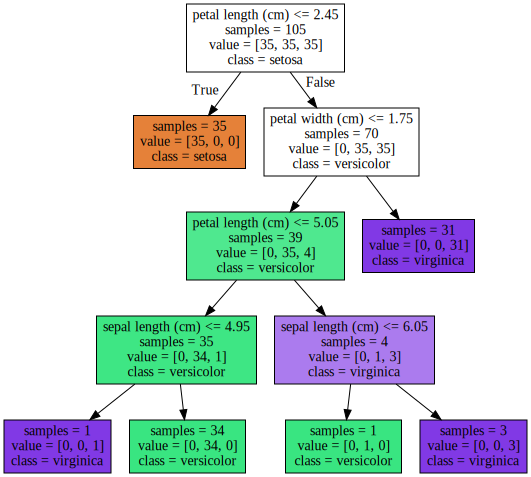

In [8]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 4. Ensemble

## 4.1 Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score = True, random_state=1234 )
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=1234, verbose=0, warm_start=False)

In [10]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.952
Mean accuracy score: 0.956


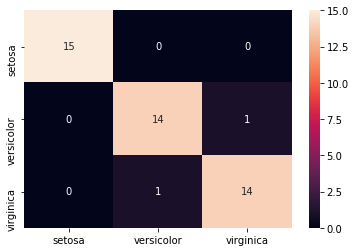

In [12]:
# Confusion Matrix를 통한 성능평가
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)

## 4.2 Bagging

In [32]:
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor(DecisionTreeClassifier(random_state=1234))
bagging.fit(X_train,y_train)
print("Trainset 정확도: {:.3f}".format(bagging.score(X_train, y_train)))
print("Test 정확도: {:.3f}".format(bagging.score(X_test, y_test)))

Trainset 정확도: 0.989
Test 정확도: 0.937


## 4.3 Boosting

### 4.3.1 Adaboost

In [35]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=1234)
adaboost.fit(X_train, y_train)
print("Trainset 정확도: {:.3f}".format(boosting.score(X_train, y_train)))
print("Test 정확도: {:.3f}".format(boosting.score(X_test, y_test)))

Trainset 정확도: 0.971
Test 정확도: 0.956


### 4.3.2 Gradient Boost

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gradientboost = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
gradientboost.fit(X_train,y_train)
print("Trainset 정확도: {:.3f}".format(gradientboost.score(X_train, y_train)))
print("Test 정확도: {:.3f}".format(gradientboost.score(X_test, y_test)))

Trainset 정확도: 1.000
Test 정확도: 0.956


### 4.3.3 XGBoost

In [37]:
import xgboost as xgb
xgb = xgb.XGBClassifier(random_state=1234, learning_rate = 0.01)
xgb.fit(X_train, y_train)
print("Trainset 정확도: {:.3f}".format(xgb.score(X_train, y_train)))
print("Test 정확도: {:.3f}".format(xgb.score(X_test, y_test)))

Trainset 정확도: 0.981
Test 정확도: 0.956
